In [11]:
# from bias_correction import XBiasCorrection
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py

In [10]:
import chart_studio
chart_studio.tools.set_credentials_file(username='chrimerss', api_key='Vat4JLC614ohsoUTgfqp')

In [2]:
from glob import glob

In [3]:
nc_files= glob('bias_corrected/pr*_ssp585_bias_corrected.nc')

In [4]:
nc_files

['bias_corrected/pr__NUIST_ssp585_bias_corrected.nc',
 'bias_corrected/pr__MRI_ssp585_bias_corrected.nc',
 'bias_corrected/pr__CCCma_ssp585_bias_corrected.nc',
 'bias_corrected/pr__IPSL_ssp585_bias_corrected.nc',
 'bias_corrected/pr__NCAR_ssp585_bias_corrected.nc',
 'bias_corrected/pr__BCC_ssp585_bias_corrected.nc',
 'bias_corrected/pr__NCC_ssp585_bias_corrected.nc',
 'bias_corrected/pr__MPI-M_ssp585_bias_corrected.nc',
 'bias_corrected/pr__CNRM-CERFACS_ssp585_bias_corrected.nc',
 'bias_corrected/pr__EC-Earth-Consortium_ssp585_bias_corrected.nc',
 'bias_corrected/pr__NOAA-GFDL_ssp585_bias_corrected.nc',
 'bias_corrected/pr__AWI_ssp585_bias_corrected.nc',
 'bias_corrected/pr__MOHC_ssp585_bias_corrected.nc',
 'bias_corrected/pr__KIOST_ssp585_bias_corrected.nc',
 'bias_corrected/pr__CMCC_ssp585_bias_corrected.nc',
 'bias_corrected/pr__CCCR-IITM_ssp585_bias_corrected.nc',
 'bias_corrected/pr__CAMS_ssp585_bias_corrected.nc',
 'bias_corrected/pr__CSIRO-ARCCSS_ssp585_bias_corrected.nc',
 'bia

In [5]:
df= pd.DataFrame(index= pd.date_range('2000-01-01 00:00:00', '2098-12-31 00:00:00', freq='D'))

In [6]:
for nc in nc_files:
    model= nc.split('__')[1].split('_')[0]
    ds= xr.open_dataset(nc).to_array()
    df.loc[ds.time.values, model]= ds.values.squeeze()
    

In [49]:
df[~pd.isna(df.NUIST)].resample('Y').sum().to_csv('pr_models_ssp585.csv')

In [7]:
df_year= df[~pd.isna(df.NUIST)].resample('Y').sum()

In [42]:
from ipywidgets import widgets

In [56]:
list_figs= []
counter=0
for scenario in ['126', '585']:
    nc_files= glob('bias_corrected/pr*_ssp%s_bias_corrected.nc'%scenario)
    df= pd.DataFrame(index= pd.date_range('2000-01-01 00:00:00', '2098-12-31 00:00:00', freq='D'))
    for nc in nc_files:
        model= nc.split('__')[1].split('_')[0]
        ds= xr.open_dataset(nc).to_array()
        df.loc[ds.time.values, model]= ds.values.squeeze()
    df_year= df[~pd.isna(df.NUIST)].resample('Y').sum()
    list_figs.append(
    go.Scatter(
        x=df_year.index.tolist()+df_year.index[::-1].tolist(), # x, then x reversed
        y=df_year.max(axis=1).tolist()+df_year.min(axis=1).tolist()[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.1)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False,
        name='Range',
    )    
    )
    counter+=1
    for col in df_year.columns:
        list_figs.append(go.Scatter(x=df_year.index, y=df_year[col], mode='lines', line=dict(color='rgba(209,204,188,0.8)'), name=col,))
        counter+=1
    list_figs.append(    go.Scatter(
            x=df_year.index,
            y=df_year.mean(axis=1),
            line=dict(color='rgb(0,0,0)'),
            mode='lines',
            name='Ensemble mean',
        ))
    counter+=1
    print(counter)
    

24
48


In [55]:
len(list_figs)

48

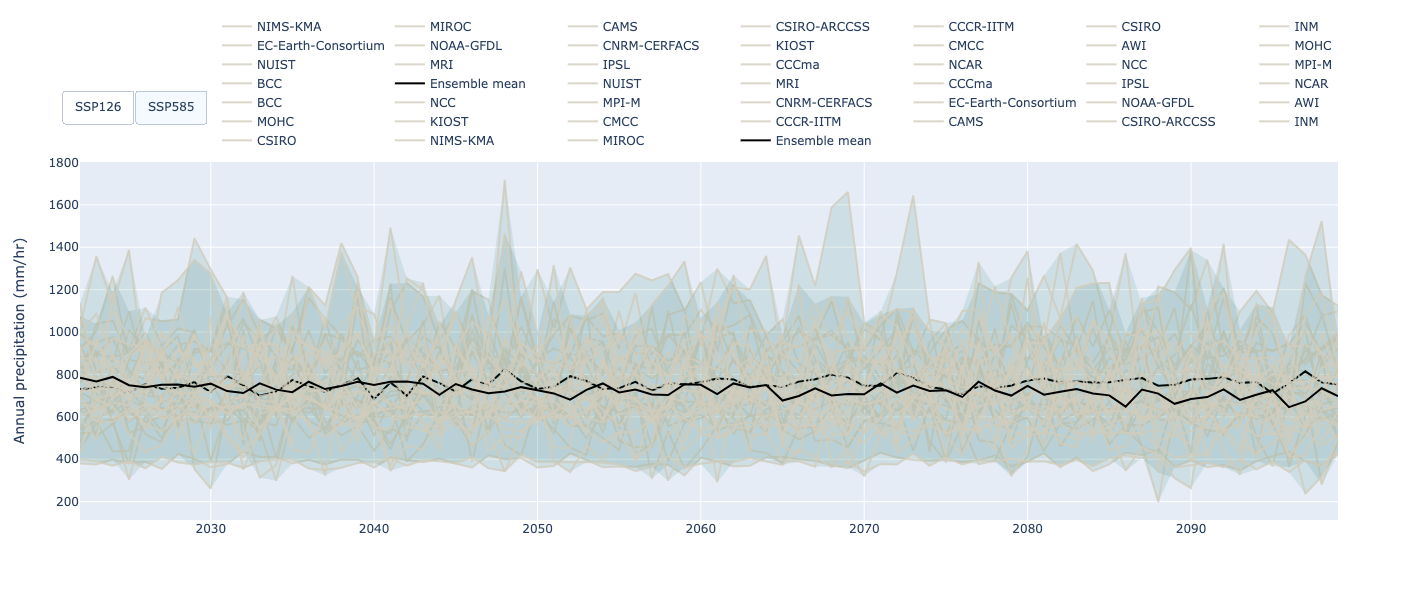

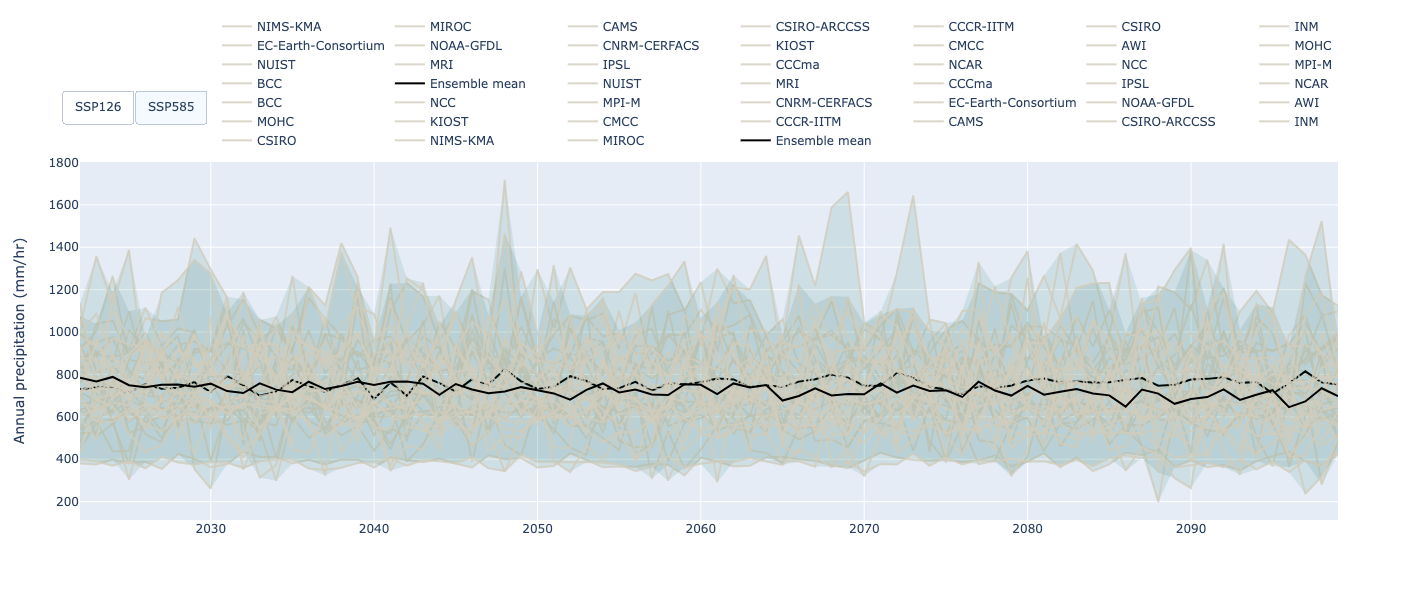

In [57]:
fig= go.Figure(list_figs, dict(width=1200, height=600))

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1),
    yaxis_title= 'Annual precipitation (mm/hr)',
    updatemenus = [
      go.layout.Updatemenu(
         type = "buttons", direction = "right", active = 1, x = 0.1, y = 1.2,
         buttons = list(
            [
               dict(
                  label = "SSP126", method = "update",
                  args = [{"visible": [True]*24+[False]*24}]
               ),
               dict(
                  label = "SSP585", method = "update", 
                  args = [{"visible": [False]*24+[True]*24}]
               )
            ]
         )
      )
   ])
fig.show()

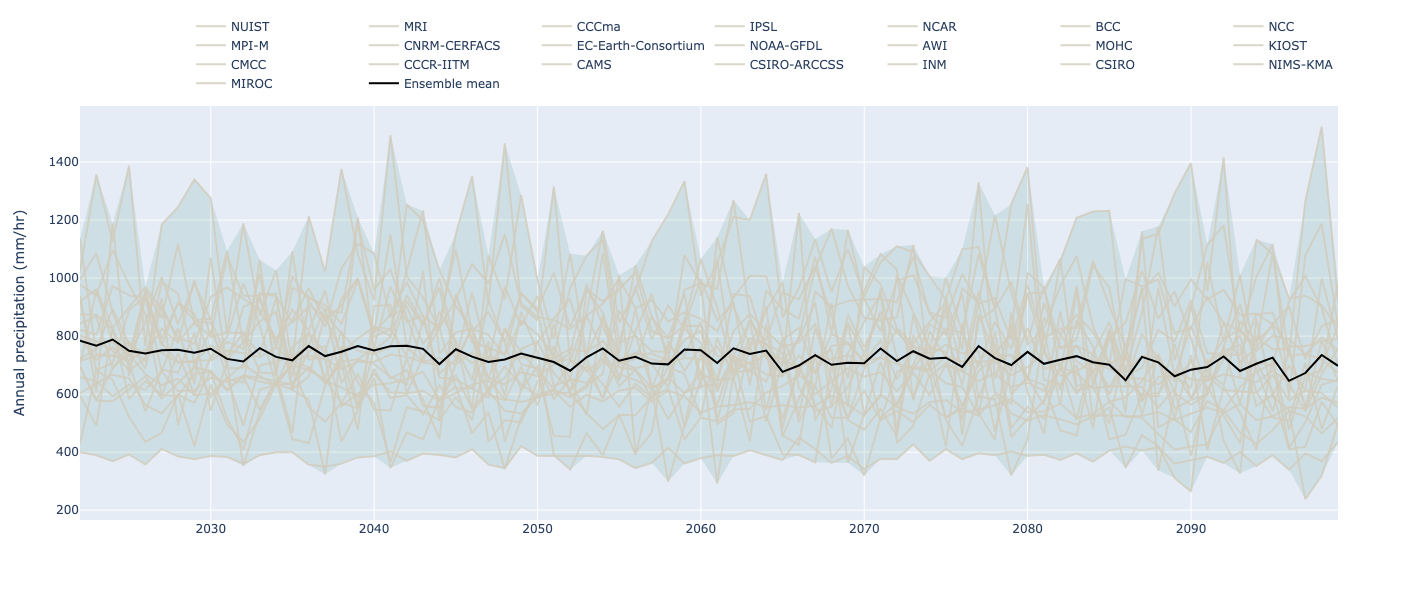

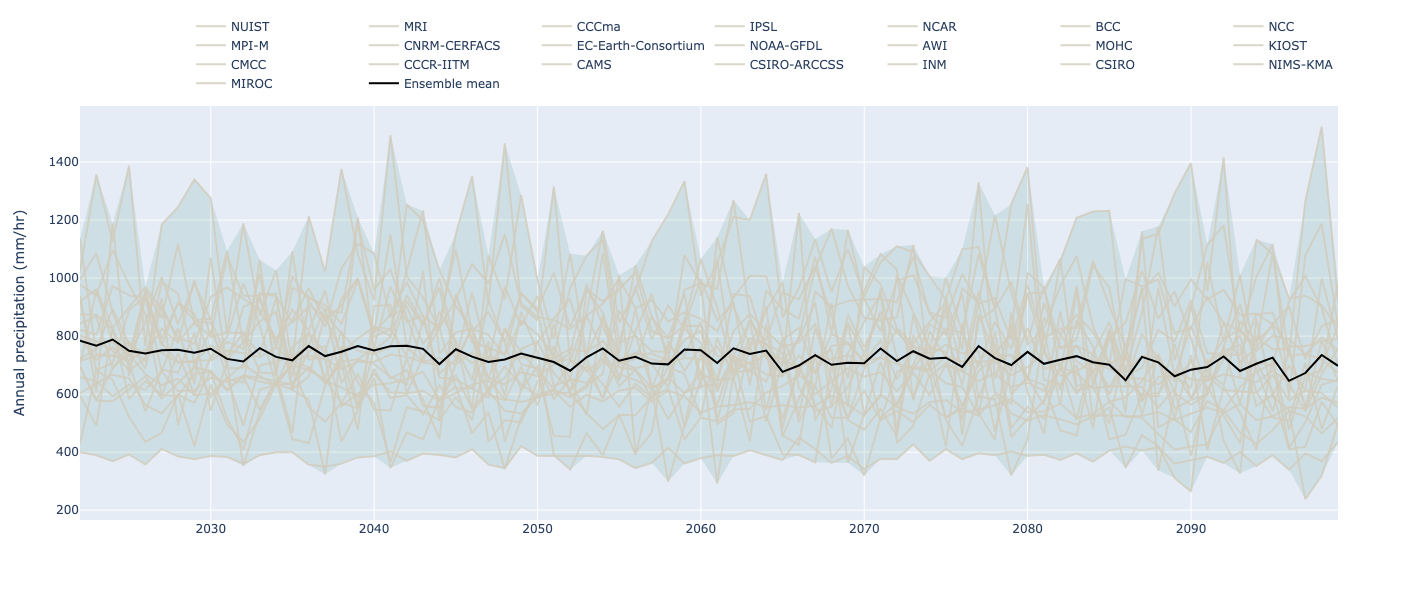

In [40]:
import plotly.graph_objs as go

list_figs =[
    go.Scatter(
        x=df_year.index.tolist()+df_year.index[::-1].tolist(), # x, then x reversed
        y=df_year.max(axis=1).tolist()+df_year.min(axis=1).tolist()[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.1)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False,
        name='Range',
    )
]

for col in df_year.columns:
    list_figs.append(go.Scatter(x=df_year.index, y=df_year[col], mode='lines', line=dict(color='rgba(209,204,188,0.8)'), name=col,))
list_figs.append(    go.Scatter(
        x=df_year.index,
        y=df_year.mean(axis=1),
        line=dict(color='rgb(0,0,0)'),
        mode='lines',
        name='Ensemble mean',
    ))

fig= go.Figure(list_figs, dict(width=1200, height=600))

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1),
    yaxis_title= 'Annual precipitation (mm/hr)')
fig.show()

In [58]:
py.iplot(fig, filename='pr', auto_open=True)